<a href="https://colab.research.google.com/github/sarobutt/Weather-Forecast/blob/main/weather_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import glob
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Checking the column names for every csv as some of had numeric headers***

In [ ]:
import os

def check_same_column_names(directory):
    # Dictionary to store column names and corresponding filenames
    column_names_dict = {}

    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            # Read the first row of the CSV file to get column names
            with open(filepath, 'r') as file:
                first_line = file.readline().strip()
                column_names = first_line.split(',')

            # Check if column names are the same as any other CSV file
            if tuple(column_names) in column_names_dict:
                column_names_dict[tuple(column_names)].append(filename)
            else:
                column_names_dict[tuple(column_names)] = [filename]

    # Filter dictionary to only include entries with more than one filename
    same_column_names = {k: v for k, v in column_names_dict.items() if len(v) > 1}

    if same_column_names:
        print("The following CSV files have the same column names:")
        for column_names, filenames in same_column_names.items():
            print(f"Column Names: {', '.join(column_names)}, Files: {', '.join(filenames)}")
    else:
        print("No CSV files have the same column names")

directory = '/content/drive/MyDrive/weatherdata_for_students' #replace the link here with the directory containing all the files, it can be local also

check_same_column_names(directory)


The following CSV files have the same column names:
Column Names: datetime, temp, dew, humidity, precip, precipprob, preciptype, snow, snowdepth, windspeed, winddir, sealevelpressure, cloudcover, solarradiation, solarenergy, uvindex, Files: colchester_002.csv, colchester_003.csv, colchester_004.csv, colchester_005.csv, colchester_007.csv, colchester_006.csv, colchester_008.csv, colchester_009.csv, colchester_013.csv, colchester_016.csv, colchester_017.csv, colchester_020.csv, colchester_021.csv, colchester_030.csv, colchester_033.csv, colchester_037.csv, colchester_035.csv, colchester_036.csv, colchester_038.csv, colchester_042.csv, colchester_044.csv, colchester_046.csv, colchester_050.csv, colchester_051.csv, colchester_053.csv, colchester_055.csv, colchester_059.csv, colchester_058.csv, colchester_061.csv, colchester_062.csv, colchester_065.csv, colchester_069.csv, colchester_071.csv, colchester_072.csv, colchester_070.csv, colchester_074.csv, colchester_081.csv, colchester_082.csv,

# ***Removing numeric headers if any***

In [ ]:
def remove_first_row_with_numeric_column_names(directory):

    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)

            # Read the first row of the CSV file to check column names
            with open(filepath, 'r') as file:
                first_line = file.readline().strip()
                column_names = first_line.split(',')

            # Check if the first row contains numeric column names
            if all(name.isdigit() for name in column_names):
                # Read the CSV file skipping the first row
                df = pd.read_csv(filepath, skiprows=1)
                # Rewrite the CSV file without the first row
                df.to_csv(filepath, index=False)
                print(f"Removed the first row with numeric column names from: {filename}")

directory = '/content/drive/MyDrive/weatherdata_for_students'  #replace the link here with the directory containing all the files, it can be local also

remove_first_row_with_numeric_column_names(directory)


In [ ]:
directory = '/content/drive/MyDrive/weatherdata_for_students'

check_same_column_names(directory)


The following CSV files have the same column names:
Column Names: datetime, temp, dew, humidity, precip, precipprob, preciptype, snow, snowdepth, windspeed, winddir, sealevelpressure, cloudcover, solarradiation, solarenergy, uvindex, Files: colchester_002.csv, colchester_003.csv, colchester_004.csv, colchester_005.csv, colchester_007.csv, colchester_006.csv, colchester_008.csv, colchester_009.csv, colchester_013.csv, colchester_016.csv, colchester_017.csv, colchester_020.csv, colchester_021.csv, colchester_030.csv, colchester_033.csv, colchester_037.csv, colchester_035.csv, colchester_036.csv, colchester_038.csv, colchester_042.csv, colchester_044.csv, colchester_046.csv, colchester_050.csv, colchester_051.csv, colchester_053.csv, colchester_055.csv, colchester_059.csv, colchester_058.csv, colchester_061.csv, colchester_062.csv, colchester_065.csv, colchester_069.csv, colchester_071.csv, colchester_072.csv, colchester_070.csv, colchester_074.csv, colchester_081.csv, colchester_082.csv,

# ***Merging all the csv of colchester together***

In [ ]:

directory = '/content/drive/MyDrive/weatherdata_for_students'

# Create an empty list to store DataFrames
all_dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
  # Check if the file is a CSV file
  if filename.endswith(".csv"):
    # Construct the full path to the CSV file
    file_path = os.path.join(directory, filename)

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Append the DataFrame to the list
    all_dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(all_dfs)

# Print information about the merged DataFrame (optional)
print(f"Merged DataFrame shape: {merged_df.shape}")
print(f"List of columns: {merged_df.columns}")





Merged DataFrame shape: (188024, 16)
List of columns: Index(['datetime', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'uvindex',
       'solarenergy'],
      dtype='object')


# ***General Overview and Statistic of data***

In [ ]:
merged_df.head()

,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
0,2000-01-01T00:00:00,5.9,5.7,98.63,0.0,0.0,NaN,NaN,NaN,9.4,210.0,1020.6,NaN,NaN,NaN,NaN
1,2000-01-01T01:00:00,6.4,5.8,96.12,0.0,0.0,NaN,NaN,NaN,15.1,233.0,1020.4,100.0,NaN,NaN,NaN
2,2000-01-01T02:00:00,6.6,6.4,98.31,0.0,0.0,NaN,NaN,NaN,13.9,238.0,1020.5,100.0,NaN,NaN,NaN
3,2000-01-01T03:00:00,7.2,6.5,95.92,0.0,0.0,NaN,NaN,NaN,14.1,232.0,1020.5,100.0,NaN,NaN,NaN
4,2000-01-01T04:00:00,7.2,6.6,96.38,0.0,0.0,NaN,NaN,NaN,14.3,242.0,1020.4,100.0,NaN,NaN,NaN


In [ ]:
merged_df.dtypes

datetime             object
temp                float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
preciptype           object
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
solarradiation      float64
uvindex             float64
solarenergy         float64
dtype: object

In [ ]:
print("\nSummary statistics:")
print(merged_df.describe())



Summary statistics:
                temp            dew       humidity         precip  \
count  187606.000000  187600.000000  187602.000000  187437.000000   
mean       10.503048       7.190720      81.596979       0.067773   
std         6.004301       4.956358      14.085087       0.623144   
min        -9.600000     -10.800000      22.430000       0.000000   
25%         6.100000       3.600000      73.490000       0.000000   
50%        10.300000       7.400000      85.480000       0.000000   
75%        14.700000      10.900000      92.680000       0.000000   
max        35.000000      21.500000     100.000000      84.324000   

          precipprob           snow      snowdepth      windspeed  \
count  187590.000000  186478.000000  186429.000000  187627.000000   
mean       10.276578       0.001008       0.062193      15.998126   
std        30.357300       0.043173       0.602604       7.916611   
min         0.000000       0.000000       0.000000       0.000000   
25%         

# ***Coverting datetime column to its appropriate form***

In [ ]:
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'], utc=True)


# ***Making the date time column index for Time series Analysis***

In [ ]:
merged_df = merged_df.set_index('datetime')


# ***Checking missing values***

Missing Value Counts:
temp                  417
dew                   423
humidity              421
precip                586
precipprob            433
snow                 1545
snowdepth            1594
windspeed             396
winddir               428
sealevelpressure     7561
cloudcover           3613
solarradiation      93106
uvindex             93103
solarenergy         93092
dtype: int64


<ipython-input-194-06b0fc718a0c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


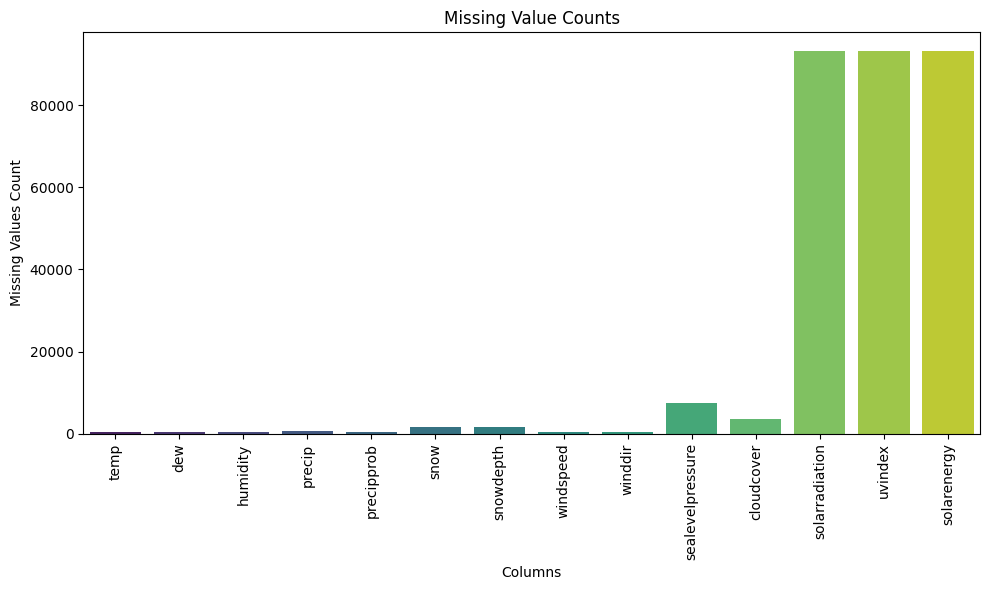

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check for missing values and calculate the counts
missing_values = merged_df.isnull().sum()

# Print the missing value counts
print("Missing Value Counts:")
print(missing_values)

# Plot the missing value counts
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Missing Value Counts")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# ***It can be seen that there is missing values in preciptype, sealevelpressure, cloudcover, solar radiation, uvindex and solarenergy the most, as preciptype is just normal categorical column, which won't be help in any kind as the data is historic and we are doing time series analysis so that is why we are going to remove this column***

In [ ]:
preciptype_counts = merged_df['preciptype'].value_counts()
print(preciptype_counts)

preciptype
rain         18543
rain,snow      851
snow            54
Name: count, dtype: int64


# ***Dropping Preciptype***

In [ ]:
merged_df = merged_df.drop('preciptype', axis=1)  # axis=1 specifies dropping columns


In [ ]:
# Resample the data to daily frequency and calculate mean
#data_daily = merged_df.resample('D').mean()
#data_daily

,temp,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,uvindex,solarenergy
datetime,,,,,,,,,,,,,,
2000-01-01 00:00:00+00:00,7.233333,6.241667,93.561250,0.001833,4.166667,NaN,NaN,8.829167,257.541667,1024.020833,80.434783,NaN,NaN,NaN
2000-01-02 00:00:00+00:00,7.154167,5.570833,89.950417,0.012792,4.166667,NaN,NaN,13.337500,211.521739,1024.929167,90.000000,NaN,NaN,NaN
2000-01-03 00:00:00+00:00,8.604167,7.183333,90.907917,0.121125,12.500000,NaN,NaN,23.983333,236.750000,1017.916667,100.000000,NaN,NaN,NaN
2000-01-04 00:00:00+00:00,4.195833,3.033333,92.427500,0.170083,8.333333,NaN,NaN,13.329167,208.708333,1013.983333,66.470588,NaN,NaN,NaN
2000-01-05 00:00:00+00:00,5.475000,3.500000,87.269167,0.000000,0.000000,0.0,0.0,21.691667,194.070833,1014.366667,86.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 00:00:00+00:00,7.379167,4.504167,82.241667,0.253458,25.000000,0.0,0.0,24.329167,219.625000,998.120833,58.495833,14.304348,0.166667,0.045833
2024-01-02 00:00:00+00:00,10.162500,8.570833,89.844167,0.740833,41.666667,0.0,0.0,28.775000,227.043478,983.829167,85.979167,6.208333,0.041667,0.025000
2024-01-03 00:00:00+00:00,8.529167,6.154167,85.150833,0.075000,20.833333,0.0,0.0,21.054167,253.208333,989.108333,67.495833,17.583333,0.166667,0.058333


# ***EDA***

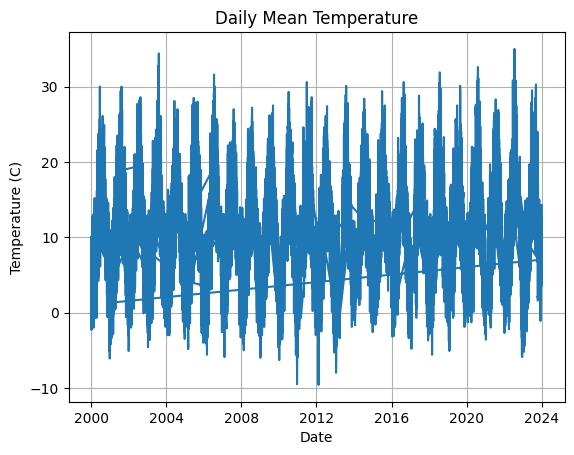

In [ ]:
plt.plot(merged_df.index, merged_df['temp'])
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Daily Mean Temperature')
plt.grid(True)
plt.show()

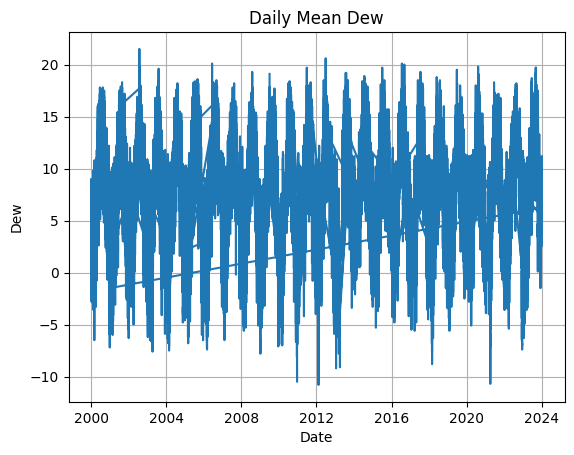

In [ ]:
plt.plot(merged_df.index, merged_df['dew'])
plt.xlabel('Date')
plt.ylabel('Dew')
plt.title('Daily Mean Dew')
plt.grid(True)
plt.show()

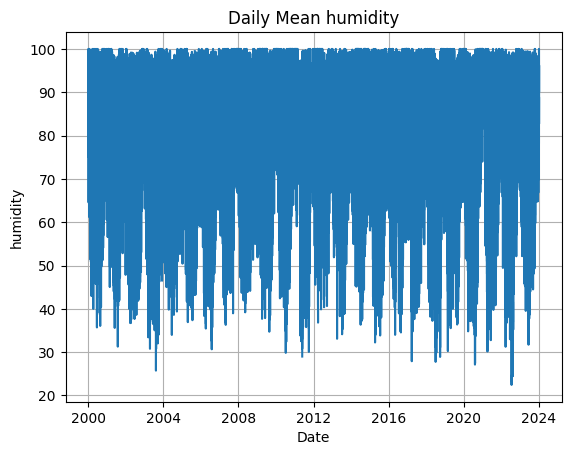

In [ ]:
plt.plot(merged_df.index, merged_df['humidity'])
plt.xlabel('Date')
plt.ylabel('humidity')
plt.title('Daily Mean humidity')
plt.grid(True)
plt.show()

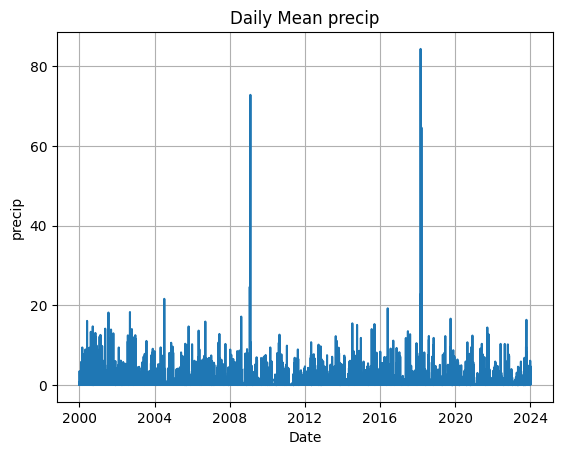

In [ ]:
plt.plot(merged_df.index, merged_df['precip'])
plt.xlabel('Date')
plt.ylabel('precip')
plt.title('Daily Mean precip')
plt.grid(True)
plt.show()

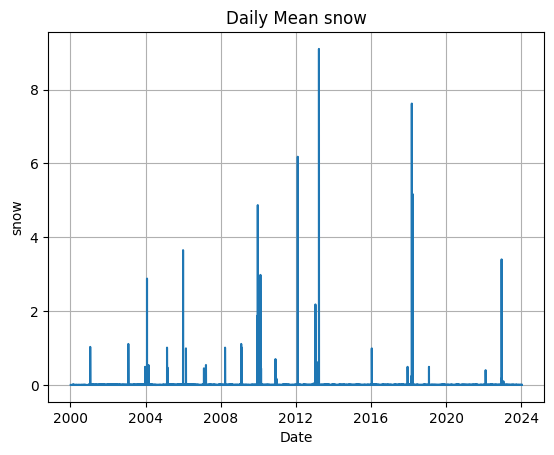

In [ ]:
plt.plot(merged_df.index, merged_df['snow'])
plt.xlabel('Date')
plt.ylabel('snow')
plt.title('Daily Mean snow')
plt.grid(True)
plt.show()

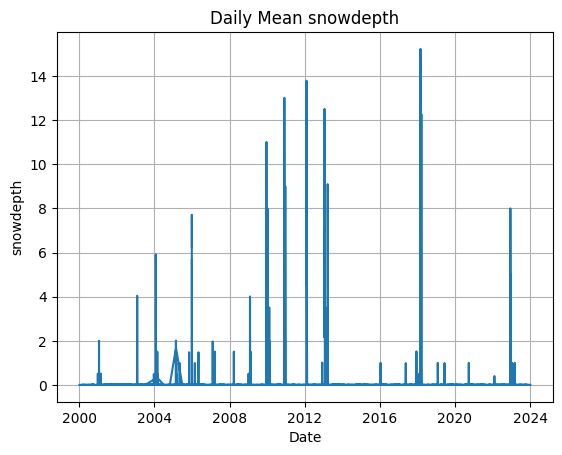

In [ ]:
plt.plot(merged_df.index, merged_df['snowdepth'])
plt.xlabel('Date')
plt.ylabel('snowdepth')
plt.title('Daily Mean snowdepth')
plt.grid(True)
plt.show()

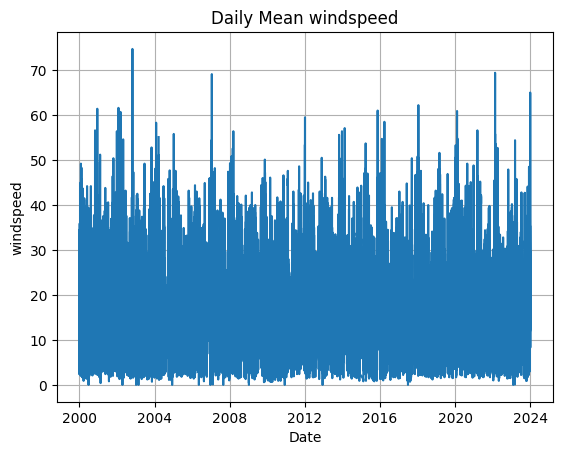

In [ ]:
plt.plot(merged_df.index, merged_df['windspeed'])
plt.xlabel('Date')
plt.ylabel('windspeed')
plt.title('Daily Mean windspeed')
plt.grid(True)
plt.show()

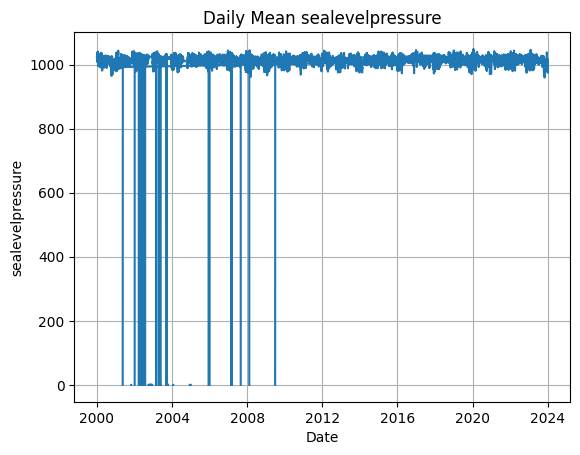

In [ ]:
plt.plot(merged_df.index, merged_df['sealevelpressure'])
plt.xlabel('Date')
plt.ylabel('sealevelpressure')
plt.title('Daily Mean sealevelpressure')
plt.grid(True)
plt.show()

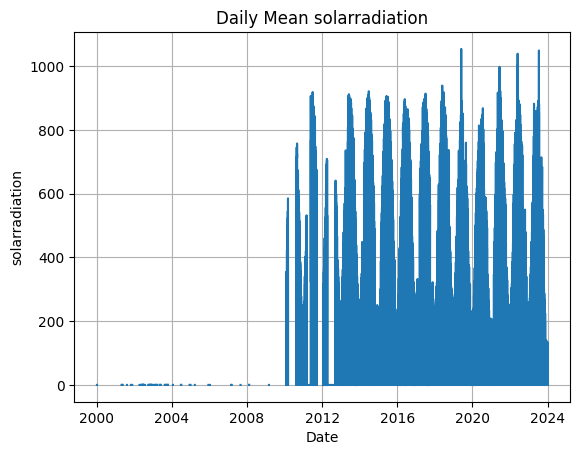

In [ ]:
plt.plot(merged_df.index, merged_df['solarradiation'])
plt.xlabel('Date')
plt.ylabel('solarradiation')
plt.title('Daily Mean solarradiation')
plt.grid(True)
plt.show()

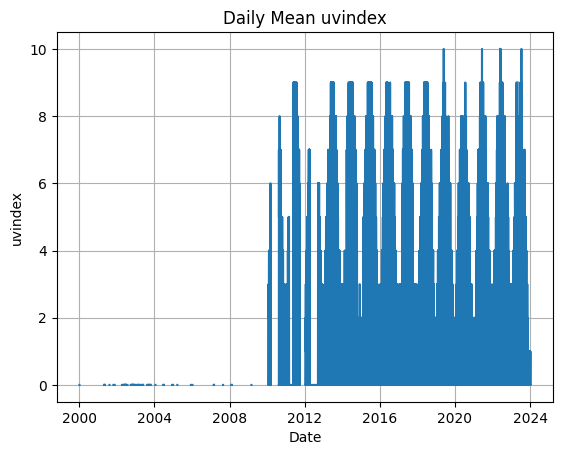

In [ ]:
plt.plot(merged_df.index, merged_df['uvindex'])
plt.xlabel('Date')
plt.ylabel('uvindex')
plt.title('Daily Mean uvindex')
plt.grid(True)
plt.show()

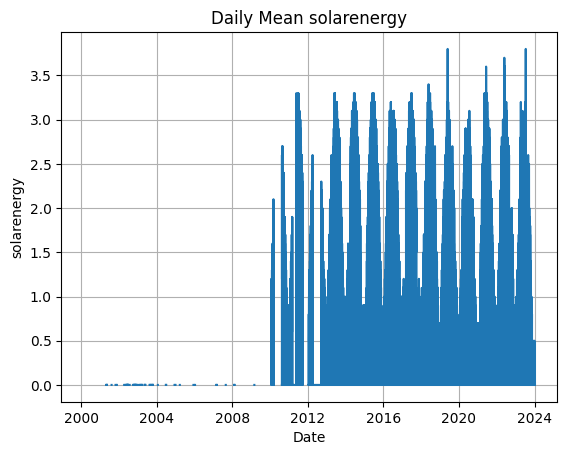

In [ ]:
plt.plot(merged_df.index, merged_df['solarenergy'])
plt.xlabel('Date')
plt.ylabel('solarenergy')
plt.title('Daily Mean solarenergy')
plt.grid(True)
plt.show()

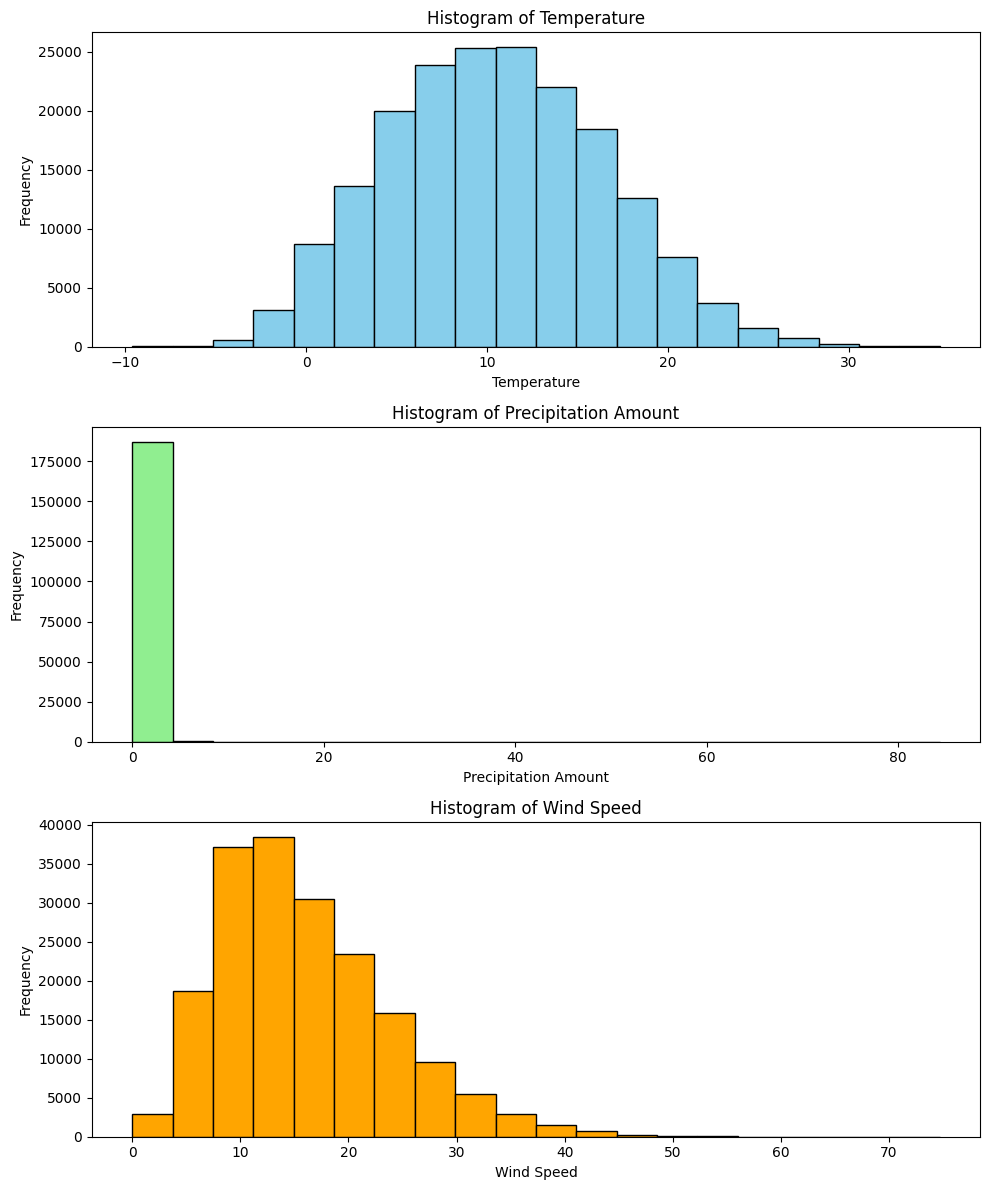

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for temperature, precipitation amount, and wind speed
plt.figure(figsize=(10, 12))

# Histogram for temperature
plt.subplot(3, 1, 1)
plt.hist(merged_df['temp'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Histogram for precipitation amount
plt.subplot(3, 1, 2)
plt.hist(merged_df['precip'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Precipitation Amount')
plt.xlabel('Precipitation Amount')
plt.ylabel('Frequency')

# Histogram for wind speed
plt.subplot(3, 1, 3)
plt.hist(merged_df['windspeed'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


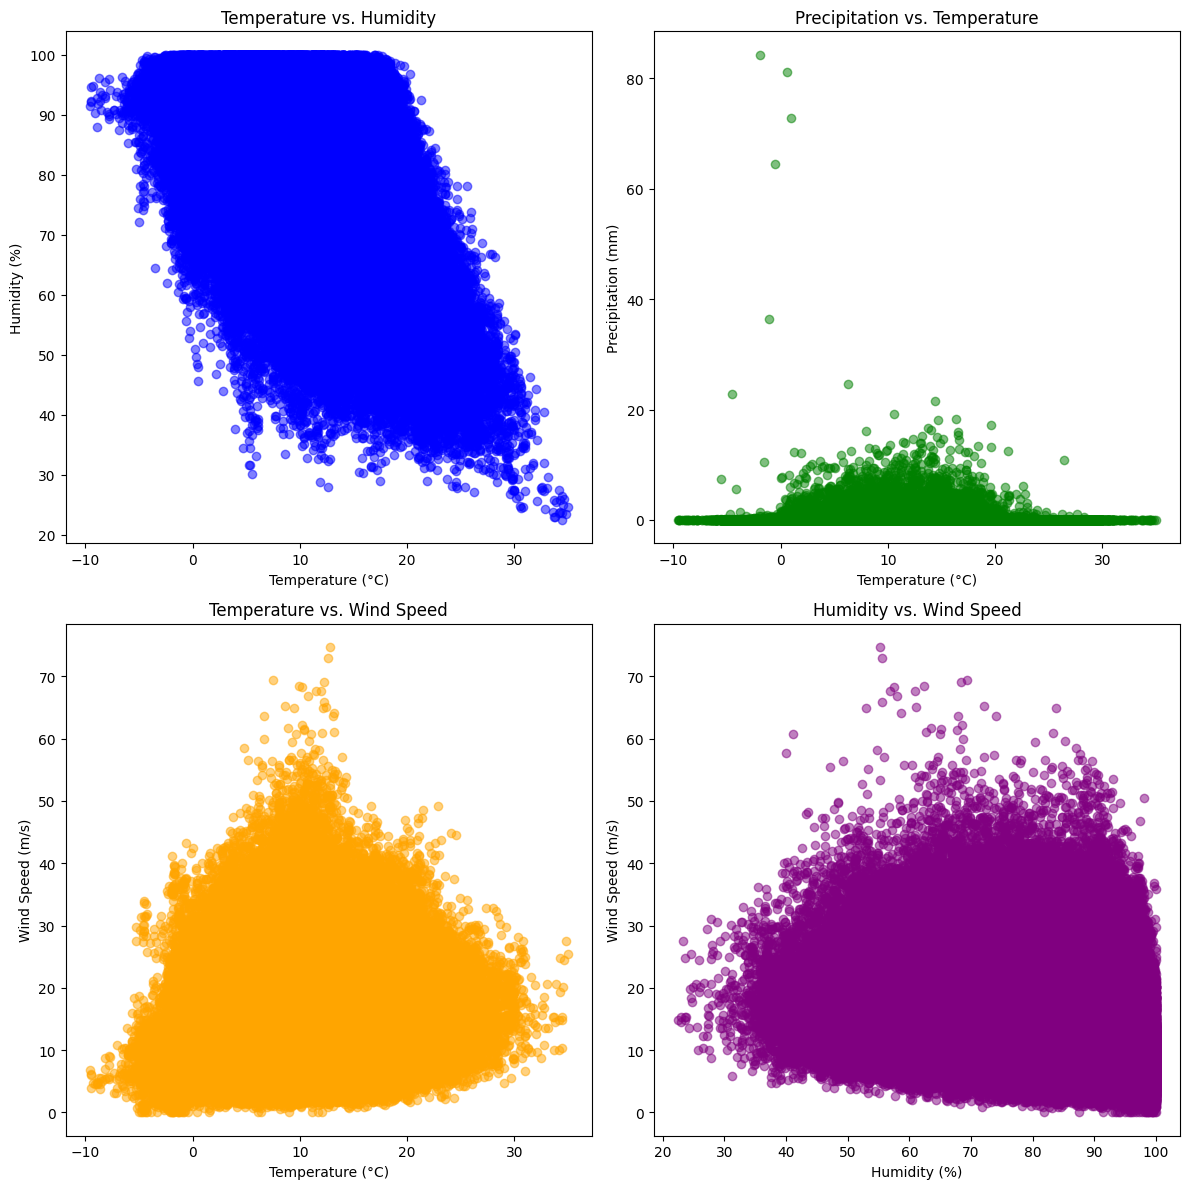

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Scatter plot for temperature vs. humidity
axs[0, 0].scatter(merged_df['temp'], merged_df['humidity'], color='blue', alpha=0.5)
axs[0, 0].set_xlabel('Temperature (°C)')
axs[0, 0].set_ylabel('Humidity (%)')
axs[0, 0].set_title('Temperature vs. Humidity')

# Scatter plot for precipitation vs. temperature
axs[0, 1].scatter(merged_df['temp'], merged_df['precip'], color='green', alpha=0.5)
axs[0, 1].set_xlabel('Temperature (°C)')
axs[0, 1].set_ylabel('Precipitation (mm)')
axs[0, 1].set_title('Precipitation vs. Temperature')

# Scatter plot for temperature vs. windspeed (optional)
axs[1, 0].scatter(merged_df['temp'], merged_df['windspeed'], color='orange', alpha=0.5)
axs[1, 0].set_xlabel('Temperature (°C)')
axs[1, 0].set_ylabel('Wind Speed (m/s)')
axs[1, 0].set_title('Temperature vs. Wind Speed')

# Scatter plot for humidity vs. windspeed (optional)
axs[1, 1].scatter(merged_df['humidity'], merged_df['windspeed'], color='purple', alpha=0.5)
axs[1, 1].set_xlabel('Humidity (%)')
axs[1, 1].set_ylabel('Wind Speed (m/s)')
axs[1, 1].set_title('Humidity vs. Wind Speed')

plt.tight_layout()
plt.show()


In [ ]:
pip install windrose


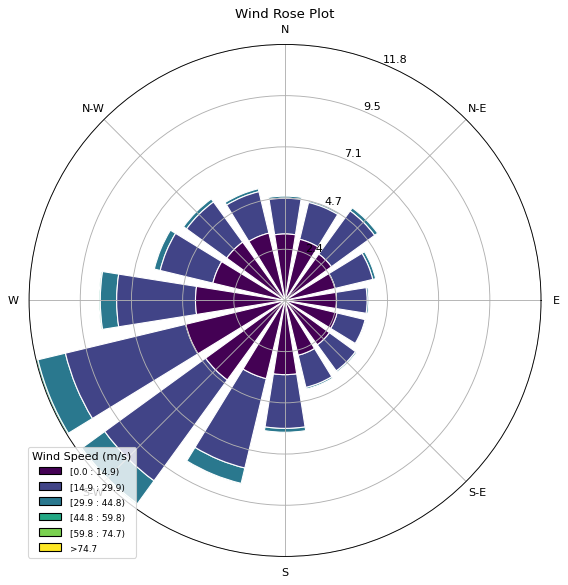

In [ ]:
import numpy as np
from windrose import WindroseAxes
import matplotlib.pyplot as plt

wind_speed = merged_df['windspeed']
wind_dir = merged_df['winddir']

ax = WindroseAxes.from_ax()

ax.bar(wind_dir, wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title='Wind Speed (m/s)')
ax.set_title('Wind Rose Plot')

plt.show()


# ***Assumption:The data was showing issue like variables being object so just a precautionary thing to convert back to float***

In [ ]:
import pandas as pd

def convert_to_float64(data):

  try:
    # Attempt conversion to float64 for all columns
    converted_data = data.astype(float)
  except (ValueError, TypeError):  # Handle potential conversion errors
    print("Error converting some columns to float64. Keeping original types.")
    converted_data = data.copy()  # Avoid modifying the original DataFrame

  return converted_data

# Assuming you have your data loaded in 'data'

# Convert data types to float64
merged_df = convert_to_float64(merged_df)

# Use 'data_float64' for further analysis


# ***Filling the missing values by backwar,forward propagation and mode***

# ***Backfilling and forward filling are particularly useful for time series data like weather data because they preserve the temporal relationships between observations. Backfilling replaces missing values with the next available observation, while forward filling replaces missing values with the previous observation. This maintains the chronological order of the data and prevents introducing artificial patterns or biases.***

# ***That is why most of the columns which show a relationship are filled with bfilll and ffill whereas other are filled with mode to maintain the data integrity***

In [ ]:
def fill_missing_values(data, method):
  """
  Fills missing values in a pandas Series using the specified method,
  handling potential object data types.

  Args:
      data: A pandas Series containing the data with missing values.
      method: The filling method to use (ffill, bfill, linear, spline, mode).

  Returns:
      A pandas Series with the missing values filled.
  """
  if method == 'ffill':
    return data.fillna(method=method)  # Forward fill for numeric columns
  elif method == 'bfill':
    return data.fillna(method=method)  # Backward fill for numeric columns
  elif method == 'linear':
    # Check if data type is numeric before interpolation
    if pd.api.types.is_numeric_dtype(data):
      x = data.dropna().index.to_numpy()
      y = data.dropna().to_numpy()
      f = interp1d(x, y)
      filled_data = pd.Series(f(data.index), index=data.index)
      return filled_data.fillna(method='ffill')  # Fill remaining NaNs with ffill
    else:
      # Impute with mode (categorical data)
      imputer = SimpleImputer(strategy='most_frequent')
      return pd.Series(imputer.fit_transform(data.values.reshape(-1, 1))[:, 0], index=data.index)
  elif method == 'spline':
    # Check if data type is numeric before interpolation
    if pd.api.types.is_numeric_dtype(data):
      x = data.dropna().index.to_numpy()
      y = data.dropna().to_numpy()
      spline = CubicSpline(x, y)
      filled_data = pd.Series(spline(data.index), index=data.index)
      return filled_data.fillna(method='ffill')  # Fill remaining NaNs with ffill
    else:
      # Impute with mode (categorical data)
      imputer = SimpleImputer(strategy='most_frequent')
      return pd.Series(imputer.fit_transform(data.values.reshape(-1, 1))[:, 0], index=data.index)
  elif method == 'mode':
    # Impute with mode (categorical data)
    imputer = SimpleImputer(strategy='most_frequent')
    return pd.Series(imputer.fit_transform(data.values.reshape(-1, 1))[:, 0], index=data.index)


In [ ]:
# Assuming you have a Series 'data' with missing values and a chosen 'method'

# Call the fill_missing_values function to impute the missing values
imputed_data = fill_missing_values(merged_df, 'ffill')

# Now 'imputed_data' is a pandas Series with the missing values filled
print(imputed_data)  # Print the imputed Series

# You can further use 'imputed_data' for your analysis tasks

# Example: Check for remaining missing values (should be minimal)
print(imputed_data.isnull().sum())


                           temp  dew  humidity  precip  precipprob  snow  \
datetime                                                                   
2000-01-01 00:00:00+00:00   5.9  5.7     98.63     0.0         0.0   NaN   
2000-01-01 01:00:00+00:00   6.4  5.8     96.12     0.0         0.0   NaN   
2000-01-01 02:00:00+00:00   6.6  6.4     98.31     0.0         0.0   NaN   
2000-01-01 03:00:00+00:00   7.2  6.5     95.92     0.0         0.0   NaN   
2000-01-01 04:00:00+00:00   7.2  6.6     96.38     0.0         0.0   NaN   
...                         ...  ...       ...     ...         ...   ...   
2024-01-05 05:00:00+00:00   5.2  4.1     92.17     0.4         0.0   0.0   
2024-01-05 06:00:00+00:00   5.2  4.0     92.40     0.4         0.0   0.0   
2024-01-05 07:00:00+00:00   5.5  4.0     89.64     0.4         0.0   0.0   
2024-01-05 08:00:00+00:00   5.8  4.1     88.93     0.4         0.0   0.0   
2024-01-05 09:00:00+00:00   6.0  4.2     88.83     0.4         0.0   0.0   

           

In [ ]:
# Call the fill_missing_values function to impute the missing values
imputed_data = fill_missing_values(imputed_data, 'bfill')

# Now 'imputed_data' is a pandas Series with the missing values filled
print(imputed_data)  # Print the imputed Series

# You can further use 'imputed_data' for your analysis tasks

# Example: Check for remaining missing values (should be minimal)
print(imputed_data.isnull().sum())

                           temp  dew  humidity  precip  precipprob  snow  \
datetime                                                                   
2000-01-01 00:00:00+00:00   5.9  5.7     98.63     0.0         0.0   0.0   
2000-01-01 01:00:00+00:00   6.4  5.8     96.12     0.0         0.0   0.0   
2000-01-01 02:00:00+00:00   6.6  6.4     98.31     0.0         0.0   0.0   
2000-01-01 03:00:00+00:00   7.2  6.5     95.92     0.0         0.0   0.0   
2000-01-01 04:00:00+00:00   7.2  6.6     96.38     0.0         0.0   0.0   
...                         ...  ...       ...     ...         ...   ...   
2024-01-05 05:00:00+00:00   5.2  4.1     92.17     0.4         0.0   0.0   
2024-01-05 06:00:00+00:00   5.2  4.0     92.40     0.4         0.0   0.0   
2024-01-05 07:00:00+00:00   5.5  4.0     89.64     0.4         0.0   0.0   
2024-01-05 08:00:00+00:00   5.8  4.1     88.93     0.4         0.0   0.0   
2024-01-05 09:00:00+00:00   6.0  4.2     88.83     0.4         0.0   0.0   

           

In [ ]:
print(imputed_data.columns)


Index(['temp', 'dew', 'humidity', 'precip', 'precipprob', 'snow', 'snowdepth',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'solarradiation', 'uvindex', 'solarenergy'],
      dtype='object')


# ***Handling Time Monotocity***

> Add blockquote



# ***Due to data being random sometimes the data was not in the right order and also had duplicate time steps due to which these steps are taken***

In [ ]:

print(imputed_data.index.duplicated().sum())


0


In [ ]:
imputed_data.drop_duplicates(inplace=True)


In [ ]:
print(imputed_data.index[:10])  # Print the first 10 timestamps
print(imputed_data.index[-10:])  # Print the last 10 timestamps


DatetimeIndex(['2000-01-01 00:00:00+00:00', '2000-01-01 01:00:00+00:00',
               '2000-01-01 02:00:00+00:00', '2000-01-01 03:00:00+00:00',
               '2000-01-01 04:00:00+00:00', '2000-01-01 05:00:00+00:00',
               '2000-01-01 06:00:00+00:00', '2000-01-01 07:00:00+00:00',
               '2000-01-01 08:00:00+00:00', '2000-01-01 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', freq=None)
DatetimeIndex(['2024-01-05 00:00:00+00:00', '2024-01-05 01:00:00+00:00',
               '2024-01-05 02:00:00+00:00', '2024-01-05 03:00:00+00:00',
               '2024-01-05 04:00:00+00:00', '2024-01-05 05:00:00+00:00',
               '2024-01-05 06:00:00+00:00', '2024-01-05 07:00:00+00:00',
               '2024-01-05 08:00:00+00:00', '2024-01-05 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', freq=None)


In [ ]:
print(imputed_data.index.tz)


UTC


In [ ]:
imputed_data = imputed_data.sort_index(ascending=True)


In [ ]:
print(imputed_data.index.is_monotonic_increasing)


True


In [ ]:
print(imputed_data.index.freq)


None


In [ ]:
imputed_data.drop_duplicates(inplace=True)


In [ ]:
# Check for remaining duplicates in the datetime index
num_dupes_index = imputed_data.index.duplicated().sum()
print(f"Number of duplicates in datetime index: {num_dupes_index}")

# If duplicates still exist, investigate them further (e.g., specific timestamps)

# Handle non-unique values within days (choose one approach)

# Option 1: Custom function (replace with your logic)
def handle_daily_duplicates(group):
  # Implement logic to handle duplicates within a day (e.g., averaging)
  return group.mean()

imputed_data = imputed_data.groupby(pd.Grouper(level='datetime', freq='h')).apply(handle_daily_duplicates)

# Option 2: Resample at higher frequency (if applicable)
# merged_df = merged_df.resample('H').mean().resample('D').mean()  # Example for averaging hourly data to daily

# Now try setting the frequency (assuming duplicates are handled)
imputed_data = imputed_data.asfreq('H', fill_value=-999)


Number of duplicates in datetime index: 21


In [ ]:
print(imputed_data)

                           temp  dew  humidity  precip  precipprob  snow  \
datetime                                                                   
2000-01-01 00:00:00+00:00   5.9  5.7     98.63     0.0         0.0   0.0   
2000-01-01 01:00:00+00:00   6.4  5.8     96.12     0.0         0.0   0.0   
2000-01-01 02:00:00+00:00   6.6  6.4     98.31     0.0         0.0   0.0   
2000-01-01 03:00:00+00:00   7.2  6.5     95.92     0.0         0.0   0.0   
2000-01-01 04:00:00+00:00   7.2  6.6     96.38     0.0         0.0   0.0   
...                         ...  ...       ...     ...         ...   ...   
2024-01-05 05:00:00+00:00   5.2  4.1     92.17     0.4         0.0   0.0   
2024-01-05 06:00:00+00:00   5.2  4.0     92.40     0.4         0.0   0.0   
2024-01-05 07:00:00+00:00   5.5  4.0     89.64     0.4         0.0   0.0   
2024-01-05 08:00:00+00:00   5.8  4.1     88.93     0.4         0.0   0.0   
2024-01-05 09:00:00+00:00   6.0  4.2     88.83     0.4         0.0   0.0   

           

Missing Value Counts:
temp                0
dew                 0
humidity            0
precip              0
precipprob          0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
uvindex             0
solarenergy         0
dtype: int64


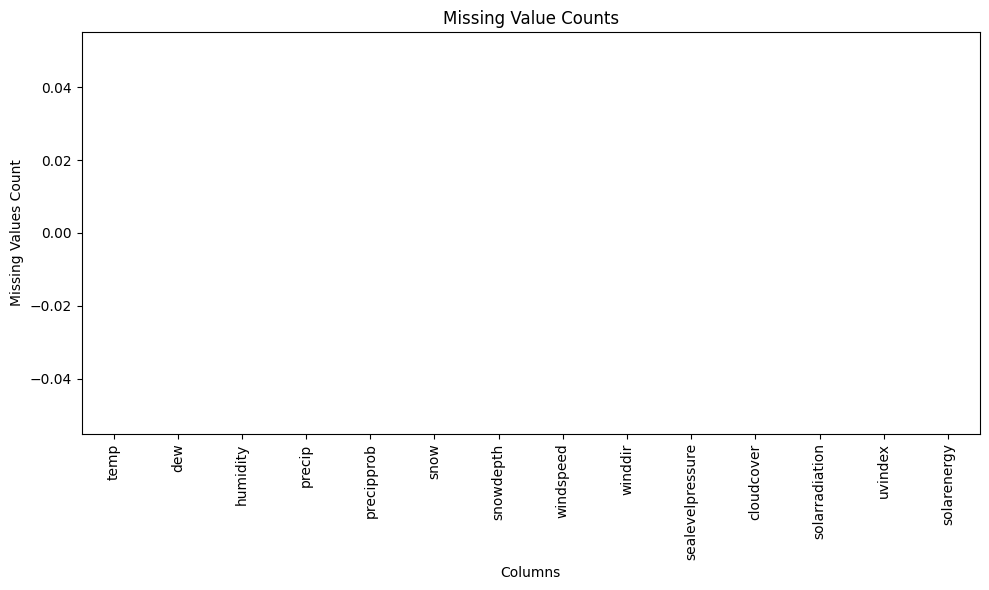

In [ ]:
# Check for missing values and calculate the counts
missing_values = imputed_data.isnull().sum()

# Print the missing value counts
print("Missing Value Counts:")
print(missing_values)

# Plot the missing value counts
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Missing Value Counts")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ***LSTM for Weather Forecasting***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'imputed_data' is your DataFrame with all variables

# Scale data (MinMaxScaler is used here, you can explore others)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(imputed_data)

# Define look_back window size (number of past time steps for prediction)
look_back = 24  # Adjust this based on your desired forecast horizon (24 hours)

# Prepare data for LSTM (create sequences of features)
def create_sequences(data, look_back):
    X, Y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, :])  # Features for the last time step only
        Y.append(data[i, :])  # Target (next time step)
    return np.array(X), np.array(Y)

# Split data into training and validation sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

X_train, Y_train = create_sequences(train_data, look_back)
X_test, Y_test = create_sequences(test_data, look_back)

# Build LSTM model (multivariate output)
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(look_back, len(imputed_data.columns))))  # Increased number of LSTM units
model.add(LSTM(100))  # Increased number of LSTM units
model.add(Dense(len(imputed_data.columns), activation='linear'))  # Number of outputs matches number of variables

# Compile the model with a lower learning rate
optimizer = Adam(lr=0.001)  # Reduced learning rate
model.compile(loss='mse', optimizer=optimizer)

# Train the model with more epochs and a larger batch size
model.fit(X_train, Y_train, epochs=1, batch_size=64, validation_data=(X_test, Y_test))  # Increased epochs and batch size

# Make predictions on unseen data (last 24 hours)
last_sequence = scaled_data[-look_back:].reshape((1, look_back, len(imputed_data.columns)))  # Get the last look_back data points and reshape for prediction
predicted_data = model.predict(last_sequence)
predicted_data = scaler.inverse_transform(predicted_data)  # Invert scaling

# Print or use the predicted values for all variables for the next 24 hours
print(predicted_data)


1/1 [==============================] - 3s 3s/step
[[ 5.2065692e+00  2.8794439e+00  8.6467400e+01 -2.9700172e-01
   1.3031621e+01 -2.8336739e-02 -6.6593797e-03  2.5409891e+01
   3.0469052e+02  9.8819604e+02  8.7242798e+01  6.7772522e+00
   2.6271055e-02 -1.0501172e-02]]


In [ ]:
# Make predictions on unseen data (next 24 hours)
forecasted_data = []
last_sequence = scaled_data[-look_back:].reshape((1, look_back, len(imputed_data.columns)))  # Get the last look_back data points and reshape for prediction

for _ in range(24):
    predicted_step = model.predict(last_sequence)
    forecasted_data.append(predicted_step[0])  # Append the predicted values for the current time step
    last_sequence = np.append(last_sequence[:,1:,:], predicted_step.reshape((1, 1, len(imputed_data.columns))), axis=1)  # Shift the input sequence by one step

forecasted_data = np.array(forecasted_data)
forecasted_data = scaler.inverse_transform(forecasted_data)  # Invert scaling

# Print or use the forecasted values for all variables for the next 24 hours
print(forecasted_data)


1/1 [==============================] - 0s 27ms/step
[[ 5.20656919e+00  2.87944388e+00  8.64673996e+01 -2.97001719e-01
   1.30316210e+01 -2.83367392e-02 -6.65937969e-03  2.54098911e+01
   3.04690521e+02  9.88196045e+02  8.72427979e+01  6.77725220e+00
   2.62710545e-02 -1.05011724e-02]
 [ 5.20316267e+00  2.70719647e+00  8.58139496e+01 -2.03143820e-01
   1.29490967e+01 -4.11674082e-02 -2.29205936e-02  2.43208675e+01
   3.03051819e+02  9.87059387e+02  8.31321182e+01 -1.70029894e-01
  -2.45084893e-02 -3.41570787e-02]
 [ 5.04384947e+00  2.43842745e+00  8.52756271e+01 -1.58608943e-01
   1.25398417e+01 -4.33435924e-02 -4.00808677e-02  2.31533031e+01
   3.01797058e+02  9.85626587e+02  7.98082962e+01 -9.89721680e+00
  -1.11108080e-01 -6.81779906e-02]
 [ 4.82134390e+00  2.14181900e+00  8.47517319e+01 -1.64617807e-01
   1.22000971e+01 -3.69173996e-02 -5.66754937e-02  2.20264492e+01
   3.00046631e+02  9.83860596e+02  7.67604141e+01 -2.10424786e+01
  -2.14089423e-01 -1.05602339e-01]
 [ 4.57910681e+0

# ***Evaluation Metrics***

In [ ]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0
    y_true_masked = y_true[mask]
    y_pred_masked = y_pred[mask]
    return np.mean(np.abs((y_true_masked - y_pred_masked) / y_true_masked)) * 100


def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

def forecast_bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

def forecast_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)



In [ ]:
# Evaluate forecasted data using metrics
y_true = test_data[-24:]  # Assuming you have the true values for the next 24 hours
mae = mean_absolute_error(y_true, forecasted_data)
mse = mean_squared_error(y_true, forecasted_data)
rmse = root_mean_squared_error(y_true, forecasted_data)
mape = mean_absolute_percentage_error(y_true, forecasted_data)
smape = symmetric_mean_absolute_percentage_error(y_true, forecasted_data)
bias = forecast_bias(y_true, forecasted_data)
accuracy = forecast_accuracy(y_true, forecasted_data)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Symmetric Mean Absolute Percentage Error (SMAPE):", smape)
print("Forecast Bias:", bias)
print("Forecast Accuracy:", accuracy)

Mean Absolute Error (MAE): 106.2196260006157
Mean Squared Error (MSE): 76090.80551383973
Root Mean Squared Error (RMSE): 275.8456189861273
Mean Absolute Percentage Error (MAPE): 29764.415984339234
Symmetric Mean Absolute Percentage Error (SMAPE): 190.5654951091415
Forecast Bias: 100.86247545610406
Forecast Accuracy: -29664.415984339234


In [ ]:
# Convert forecasted_data to a DataFrame
forecasted_df = pd.DataFrame(forecasted_data, columns=imputed_data.columns)

# Print or further process the forecasted DataFrame
print(forecasted_df)

        temp       dew   humidity    precip  precipprob      snow  snowdepth  \
0   5.206569  2.879444  86.467400 -0.297002   13.031621 -0.028337  -0.006659   
1   5.203163  2.707196  85.813950 -0.203144   12.949097 -0.041167  -0.022921   
2   5.043849  2.438427  85.275627 -0.158609   12.539842 -0.043344  -0.040081   
3   4.821344  2.141819  84.751732 -0.164618   12.200097 -0.036917  -0.056675   
4   4.579107  1.853185  84.359238 -0.192810   12.030942 -0.028607  -0.070672   
5   4.347397  1.596087  84.146553 -0.228098   12.104823 -0.023114  -0.082592   
6   4.140924  1.369524  84.019180 -0.263099   12.244196 -0.020969  -0.091745   
7   3.981479  1.176251  83.849068 -0.293172   12.349018 -0.021739  -0.099608   
8   3.788979  0.938349  83.705559 -0.306622   11.921352 -0.024875  -0.102233   
9   3.588331  0.702502  83.553726 -0.306528   11.390235 -0.028000  -0.103293   
10  3.371129  0.464664  83.430229 -0.293466   10.824243 -0.030126  -0.103654   
11  3.127969  0.220879  83.390648 -0.271

In [ ]:
import pandas as pd

# Assuming 'imputed_data' is your DataFrame with the latest timestamp
latest_timestamp = imputed_data.index[-1]  # Get the latest timestamp from the DataFrame
forecast_timestamps = pd.date_range(start=latest_timestamp, periods=24, freq='H')  # Generate timestamps for the next 24 hours

# Create a DataFrame with forecasted data and timestamps
forecasted_df = pd.DataFrame(forecasted_data, columns=imputed_data.columns, index=forecast_timestamps)

# Print or further process the forecasted DataFrame with timestamps
print(forecasted_df)


                               temp       dew   humidity    precip  \
2024-01-05 09:00:00+00:00  5.206569  2.879444  86.467400 -0.297002   
2024-01-05 10:00:00+00:00  5.203163  2.707196  85.813950 -0.203144   
2024-01-05 11:00:00+00:00  5.043849  2.438427  85.275627 -0.158609   
2024-01-05 12:00:00+00:00  4.821344  2.141819  84.751732 -0.164618   
2024-01-05 13:00:00+00:00  4.579107  1.853185  84.359238 -0.192810   
2024-01-05 14:00:00+00:00  4.347397  1.596087  84.146553 -0.228098   
2024-01-05 15:00:00+00:00  4.140924  1.369524  84.019180 -0.263099   
2024-01-05 16:00:00+00:00  3.981479  1.176251  83.849068 -0.293172   
2024-01-05 17:00:00+00:00  3.788979  0.938349  83.705559 -0.306622   
2024-01-05 18:00:00+00:00  3.588331  0.702502  83.553726 -0.306528   
2024-01-05 19:00:00+00:00  3.371129  0.464664  83.430229 -0.293466   
2024-01-05 20:00:00+00:00  3.127969  0.220879  83.390648 -0.271172   
2024-01-05 21:00:00+00:00  2.841217 -0.040317  83.464012 -0.243143   
2024-01-05 22:00:00+

In [ ]:
# Concatenate imputed data with forecasted data
merged_data = pd.concat([imputed_data, forecasted_df])

# Print or further process the merged data
print(merged_data)


                               temp       dew   humidity    precip  \
2000-01-01 00:00:00+00:00  5.900000  5.700000  98.630000  0.000000   
2000-01-01 01:00:00+00:00  6.400000  5.800000  96.120000  0.000000   
2000-01-01 02:00:00+00:00  6.600000  6.400000  98.310000  0.000000   
2000-01-01 03:00:00+00:00  7.200000  6.500000  95.920000  0.000000   
2000-01-01 04:00:00+00:00  7.200000  6.600000  96.380000  0.000000   
...                             ...       ...        ...       ...   
2024-01-06 04:00:00+00:00  0.176237 -2.070026  86.259544 -0.153956   
2024-01-06 05:00:00+00:00 -0.055791 -2.309166  86.162880 -0.152075   
2024-01-06 06:00:00+00:00 -0.230368 -2.531777  85.864166 -0.149169   
2024-01-06 07:00:00+00:00 -0.361490 -2.743291  85.413071 -0.145400   
2024-01-06 08:00:00+00:00 -0.455271 -2.942570  84.843124 -0.143047   

                           precipprob      snow  snowdepth  windspeed  \
2000-01-01 00:00:00+00:00    0.000000  0.000000   0.000000   9.400000   
2000-01-01 01

# ***Correlation***

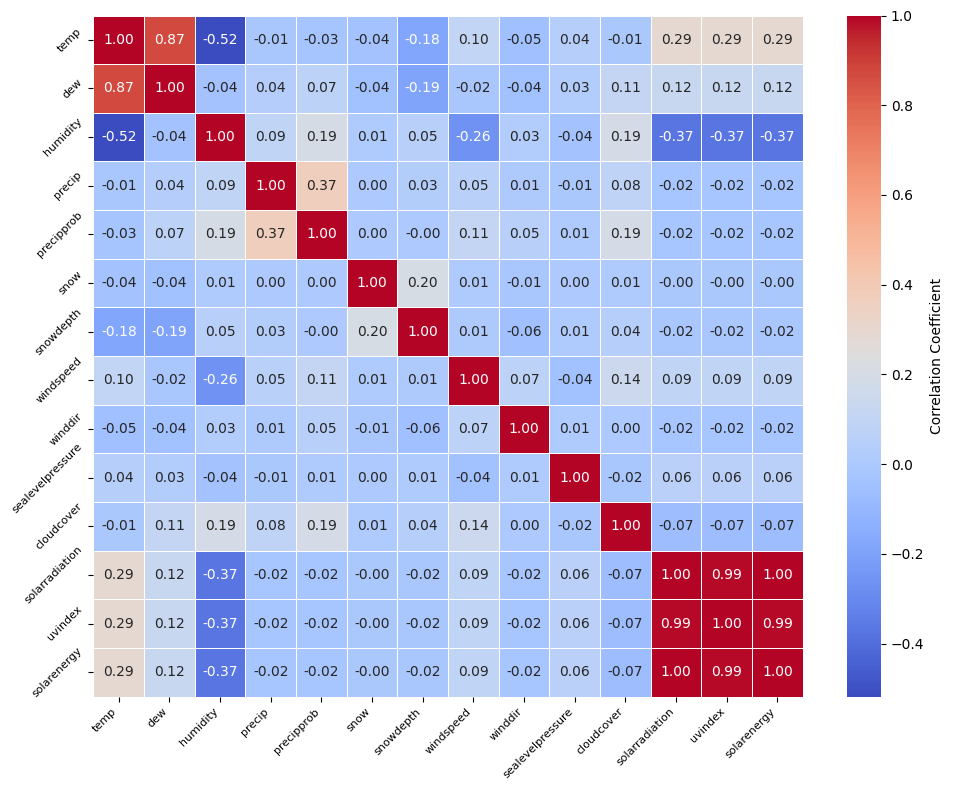

In [ ]:
import pandas as pd  # Assuming you're using Pandas


# Select numerical features
numerical_features = imputed_data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_features.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed

# Customize the heatmap
sns.heatmap(correlation_matrix,
            annot=True,  # Display correlation values in cells
            cmap='coolwarm',  # Set a colormap (adjust as needed)
            fmt='.2f',  # Format values with 2 decimal places
            linewidths=0.5,  # Cell borders
            cbar_kws={'label': 'Correlation Coefficient'})  # Colorbar label

# Rotate labels (adjust angle if needed)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)

# Adjust font size (adjust as needed)
plt.tick_params(labelsize=8)

# Show the plot
plt.tight_layout()  # Adjust spacing for better readability
plt.show()


In [ ]:
# Filter positive correlation
positive_correlation = correlation_matrix[correlation_matrix > 0.5]

# Filter negative correlation
negative_correlation = correlation_matrix[correlation_matrix < -0.5]

# Display positive correlation values
print("Positive Correlation:")
print(positive_correlation.dropna())

# Display negative correlation values
print("\nNegative Correlation:")
print(negative_correlation.dropna())


Positive Correlation:
Empty DataFrame
Columns: [temp, dew, humidity, precip, precipprob, snow, snowdepth, windspeed, winddir, sealevelpressure, cloudcover, solarradiation, uvindex, solarenergy]
Index: []

Negative Correlation:
Empty DataFrame
Columns: [temp, dew, humidity, precip, precipprob, snow, snowdepth, windspeed, winddir, sealevelpressure, cloudcover, solarradiation, uvindex, solarenergy]
Index: []


# ***Surplus Energy Calculation***

# ***The usage of solar is due to high correlation of variables with all the things related to solar energy.***

In [ ]:
def calculate_surplus_energy(row,
                             solar_radiation_threshold=500,
                             cloud_cover_threshold=30,
                             temp_threshold=20,
                             humidity_threshold=60,
                             windspeed_threshold=10,
                             weight_solar=0.8,  #
                             weight_cloud=0.05,
                             weight_temp=0.05,
                             weight_humidity=0.05,
                             weight_windspeed=0.05):

    # Check and normalize weights
    weights = [weight_solar, weight_cloud, weight_temp, weight_humidity, weight_windspeed]

    # Ensure non-negative weights
    if any(w < 0 for w in weights):
        raise ValueError("Weights must be non-negative.")

    # Normalize weights if they don't sum to 1
    if sum(weights) != 1:
        total_weight = sum(weights)
        weights = [w / total_weight for w in weights]

    # Calculate normalized scores (0-1) for each factor
    solar_score = max(0, min(1, (row['solarradiation'] - solar_radiation_threshold) / (1000 - solar_radiation_threshold)))
    cloud_score = 1 - min(1, row['cloudcover'] / cloud_cover_threshold)
    temp_score = max(0, min(1, (row['temp'] - temp_threshold) / (30 - temp_threshold)))
    humidity_score = 1 - min(1, row['humidity'] / humidity_threshold)
    windspeed_score = 1 - min(1, row['windspeed'] / windspeed_threshold)

    # Calculate weighted score (0-1)
    weighted_score = sum(w * s for w, s in zip(weights, [solar_score, cloud_score, temp_score, humidity_score, windspeed_score]))

    # Threshold-based or continuous output
    if weighted_score > 0.5:
        return 1  # Potential surplus
    else:
        return 0  # No surplus


In [ ]:
imputed_data['surplus_energy'] = imputed_data.apply(calculate_surplus_energy, axis=1)


In [ ]:
# Count unique value counts for a specific column (e.g., 'column_name')
unique_counts = imputed_data['surplus_energy'].value_counts()

# Print the unique value counts
print("Unique value counts:")
print(unique_counts)

Unique value counts:
surplus_energy
0    209591
1       899
Name: count, dtype: int64


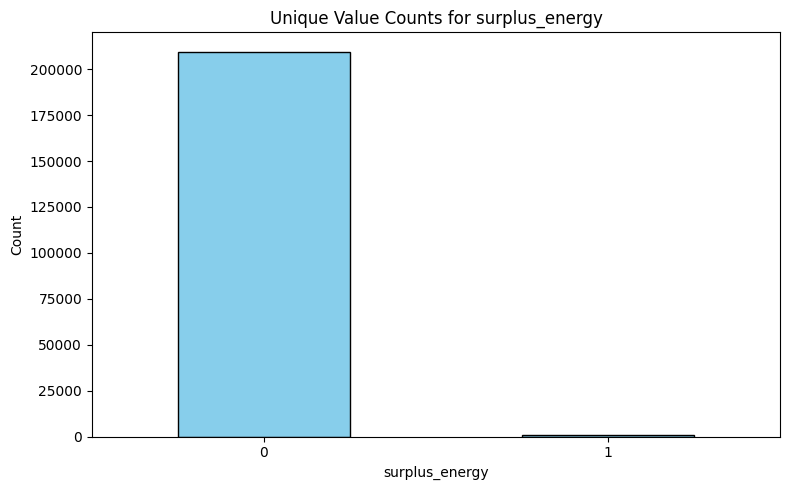

In [ ]:
# Plot the results
plt.figure(figsize=(8, 5))
unique_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Unique Value Counts for surplus_energy')
plt.xlabel('surplus_energy')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# ***Under Sampling***

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler


target_class_column = 'surplus_energy'  # Replace with your actual target class column name

# Determine the majority class automatically
majority_class = imputed_data[target_class_column].value_counts().idxmax()

# Create the undersampling object
rus = RandomUnderSampler(sampling_strategy='majority')

# Separate features and target variable
X = imputed_data.drop(target_class_column, axis=1)
y = imputed_data[target_class_column]

# Apply undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create the undersampled DataFrame
undersampled_df = pd.DataFrame(X_resampled, columns=X.columns)
undersampled_df[target_class_column] = y_resampled

# Check the class distribution
print(undersampled_df[target_class_column].value_counts())


surplus_energy
0    899
1    899
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier



X = undersampled_df.drop(columns=['surplus_energy'])  # Features
y = undersampled_df['surplus_energy']  # Target variable

# Initialize Random Forest Classifier as the estimator
estimator = RandomForestClassifier()

# Initialize RFECV with 10-fold cross-validation
selector = RFECV(estimator, cv=10)

# Fit RFECV
selector = selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.support_]

# Print selected features
print("Selected features:", selected_features)


Selected features: Index(['temp', 'humidity', 'cloudcover', 'solarradiation', 'uvindex',
       'solarenergy'],
      dtype='object')


# ***XGBoost Classifier***

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define features and target variable for classification
X_cls = undersampled_df[['temp', 'humidity', 'cloudcover', 'solarradiation', 'uvindex','solarenergy']]
y_cls = undersampled_df['surplus_energy']

# Split the data into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 5, 7],            # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.3], # Step size shrinkage used in update to prevent overfitting
    'subsample': [0.5, 0.8, 1.0],      # Subsample ratio of the training instances
    'colsample_bytree': [0.5, 0.8, 1.0]# Subsample ratio of columns when constructing each tree
}

# Initialize XGBClassifier
clf = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train_cls, y_train_cls)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize XGBClassifier with best parameters
best_clf = XGBClassifier(random_state=42, **best_params)

# Train the XGBClassifier with best parameters
best_clf.fit(X_train_cls, y_train_cls)

# Predict on the testing set
y_pred_cls = best_clf.predict(X_test_cls)

# Calculate classification accuracy
accuracy_cls = accuracy_score(y_test_cls, y_pred_cls)
print("Classification Accuracy:", accuracy_cls)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Classification Accuracy: 0.9916666666666667


# ***Confusion Matrix***

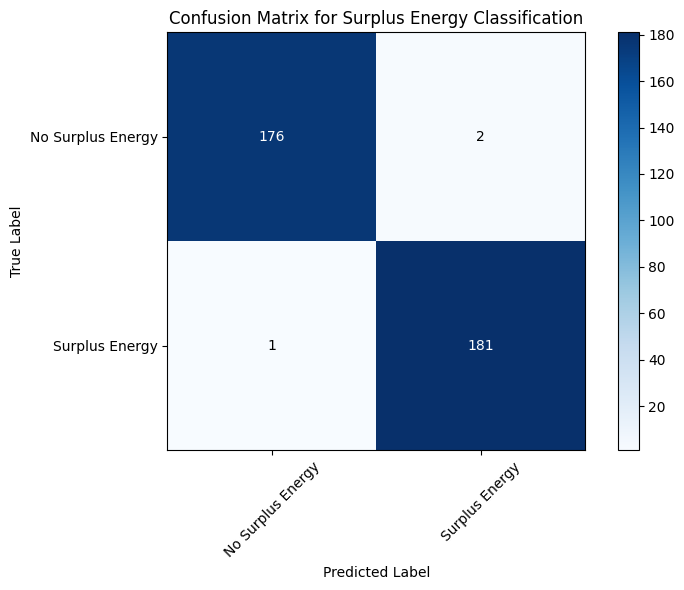

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Surplus Energy Classification')
plt.colorbar()
tick_marks = np.arange(len(['No Surplus Energy', 'Surplus Energy']))
plt.xticks(tick_marks, ['No Surplus Energy', 'Surplus Energy'], rotation=45)
plt.yticks(tick_marks, ['No Surplus Energy', 'Surplus Energy'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add counts in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Calculate confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual No Surplus', 'Actual Surplus'], columns=['Predicted No Surplus', 'Predicted Surplus'])

# Print the DataFrame
print("Confusion Matrix for Surplus Energy Classification:\n")
print(cm_df)


Confusion Matrix for Surplus Energy Classification:

                   Predicted No Surplus  Predicted Surplus
Actual No Surplus                   176                  2
Actual Surplus                        1                181


# ***Classification Report***

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test_cls, y_pred_cls)

# Print classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.99      0.99      0.99       182

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# ***ROC AUC Plot***

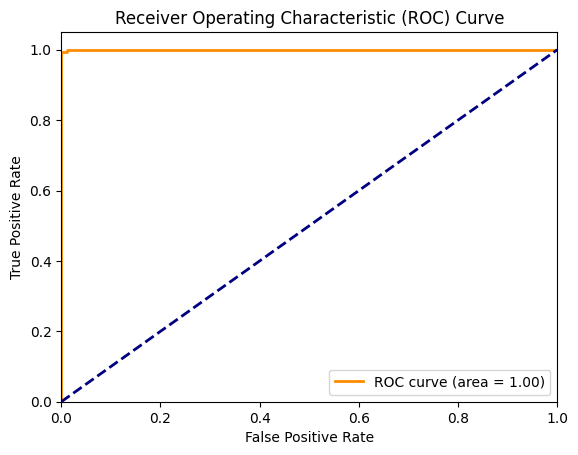

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_prob_cls = best_clf.predict_proba(X_test_cls)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_cls, y_prob_cls)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
